In [33]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.3 MB/s eta 0:00:0000:01
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.2 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 MB 5.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv("./data/cleaned_sneaks.csv")
sns.set_theme(style="darkgrid")

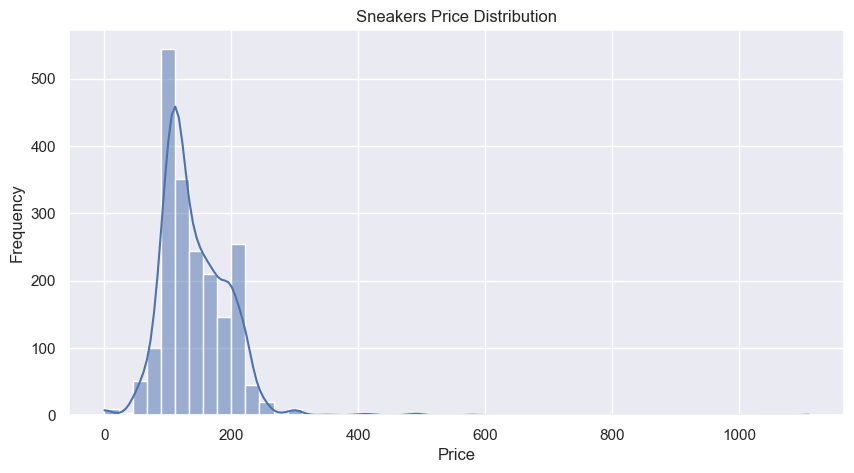

In [91]:
plt.figure(figsize=(10, 5))
sns.histplot(ds["retail"], bins=50, kde=True)
plt.title("Sneakers Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


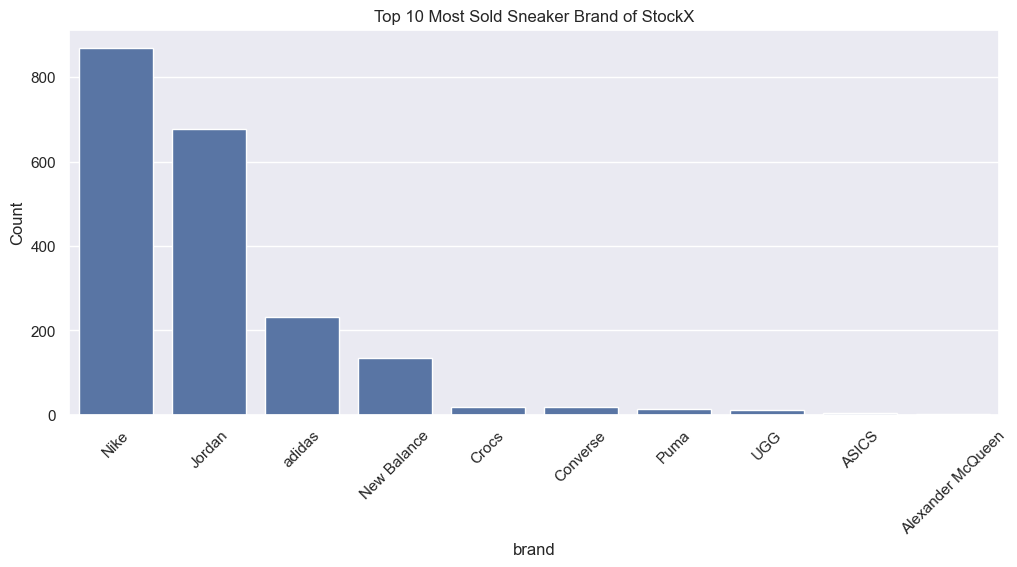

In [92]:
plt.figure(figsize=(12, 5))
top_brands = ds["brand"].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Sold Sneaker Brand of StockX")
plt.ylabel("Count")
plt.show()

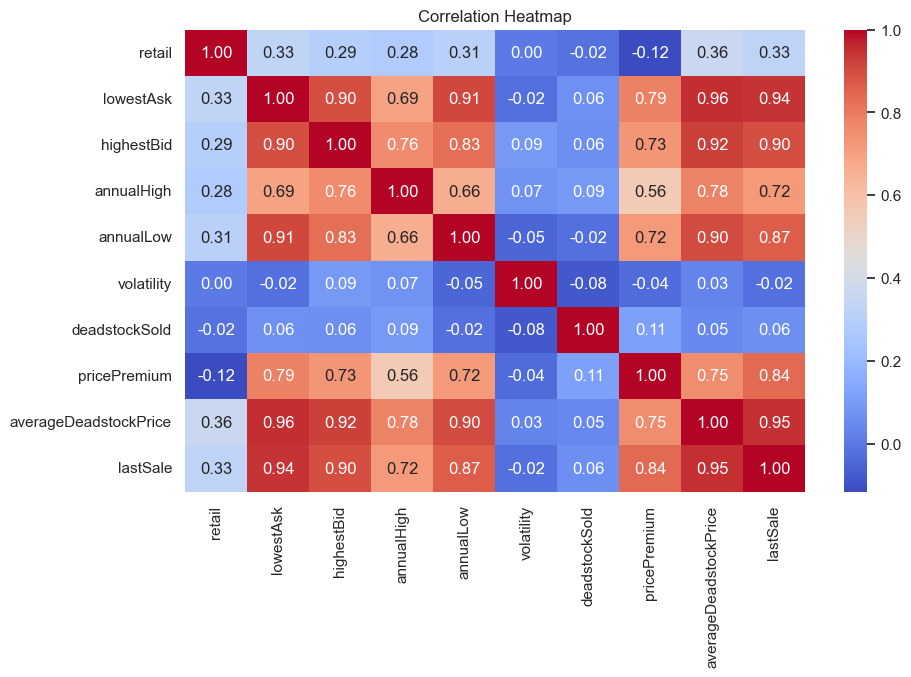

In [93]:
plt.figure(figsize=(10, 6))
sns.heatmap(ds.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [95]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
ds["brand_enc"] = label_encoder.fit_transform(ds["brand"])

ds.head(10)

,item,brand,retail,release,lowestAsk,highestBid,annualHigh,annualLow,volatility,deadstockSold,pricePremium,averageDeadstockPrice,lastSale,img_path,brand_enc
0,Jordan 4 Retro SB Pine Green,Jordan,225,2023-03-21,325,480,952,280,0.061347,5408,0.542,388,347,feetflix/Jordan 4 Retro SB Pine Green.jpg,8
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,2023-03-11,190,280,757,150,0.115522,16894,0.111,297,234,feetflix/Jordan 3 Retro White Cement Reimagine...,8
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,2023-03-07,893,1526,4831,705,0.232434,4711,1.125,1160,850,feetflix/Nike Air Force 1 Low Tiffany & Co. 18...,11
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,2023-03-26,177,200,550,150,0.095096,603,0.200,228,180,feetflix/Nike Air Max 1 '86 Big Bubble Sport R...,11
4,MSCHF Big Red Boot,MSCHF,350,2023-02-16,570,611,2445,498,0.186197,323,1.373,883,831,feetflix/MSCHF Big Red Boot.jpg,9
5,New Balance 990v6 Action Bronson Baklava,New Balance,220,2023-03-17,320,450,844,251,0.131970,281,0.586,403,349,feetflix/New Balance 990v6 Action Bronson Bakl...,10
6,Nike Dunk Low Retro White Black Panda (2021),Nike,110,2021-03-10,139,165,697,0,0.046333,233962,0.318,191,145,feetflix/Nike Dunk Low Retro White Black Panda...,11
7,Nike Dunk Low Retro White Black Panda (2021) (...,Nike,100,2021-03-10,130,141,308,110,0.059427,109763,0.440,179,144,feetflix/Nike Dunk Low Retro White Black Panda...,11
8,Nike Dunk Low Grey Fog,Nike,100,2021-09-21,145,265,569,120,0.095350,25651,0.690,216,169,feetflix/Nike Dunk Low Grey Fog.jpg,11
9,Nike Dunk Low Retro White Black Panda (2021) (GS),Nike,85,2021-03-10,112,126,278,88,0.042461,87660,0.529,162,130,feetflix/Nike Dunk Low Retro White Black Panda...,11


In [96]:
ds["release"] = pd.to_datetime(ds["release"])
ds["release_y"] = ds["release"].dt.year
ds["release_m"] = ds["release"].dt.month
ds["release_d"] = ds["release"].dt.day
ds["release_w"] = ds["release"].dt.weekday

ds.head()

,item,brand,retail,release,lowestAsk,highestBid,annualHigh,annualLow,volatility,deadstockSold,pricePremium,averageDeadstockPrice,lastSale,img_path,brand_enc,release_y,release_m,release_d,release_w
0,Jordan 4 Retro SB Pine Green,Jordan,225,2023-03-21,325,480,952,280,0.061347,5408,0.542,388,347,feetflix/Jordan 4 Retro SB Pine Green.jpg,8,2023,3,21,1
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,2023-03-11,190,280,757,150,0.115522,16894,0.111,297,234,feetflix/Jordan 3 Retro White Cement Reimagine...,8,2023,3,11,5
2,Nike Air Force 1 Low Tiffany & Co. 1837,Nike,400,2023-03-07,893,1526,4831,705,0.232434,4711,1.125,1160,850,feetflix/Nike Air Force 1 Low Tiffany & Co. 18...,11,2023,3,7,1
3,Nike Air Max 1 '86 Big Bubble Sport Red,Nike,150,2023-03-26,177,200,550,150,0.095096,603,0.200,228,180,feetflix/Nike Air Max 1 '86 Big Bubble Sport R...,11,2023,3,26,6
4,MSCHF Big Red Boot,MSCHF,350,2023-02-16,570,611,2445,498,0.186197,323,1.373,883,831,feetflix/MSCHF Big Red Boot.jpg,9,2023,2,16,3


In [100]:
from sklearn.preprocessing import StandardScaler

num_cols = ["retail", "lowestAsk", "highestBid", "annualHigh", "annualLow", "volatility", "deadstockSold", "pricePremium", "averageDeadstockPrice", "lastSale"]

scaler = StandardScaler()
ds[num_cols] = scaler.fit_transform(ds[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split

X = ds.drop